<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#(Presentation-Title)" data-toc-modified-id="(Presentation-Title)-1">(Presentation Title)</a></span><ul class="toc-item"><li><span><a href="#by-(your-name-here)" data-toc-modified-id="by-(your-name-here)-1.1">by (your name here)</a></span></li><li><span><a href="#Investigation-Overview" data-toc-modified-id="Investigation-Overview-1.2">Investigation Overview</a></span></li><li><span><a href="#Dataset-Overview" data-toc-modified-id="Dataset-Overview-1.3">Dataset Overview</a></span></li><li><span><a href="#(Visualization-1)" data-toc-modified-id="(Visualization-1)-1.4">(Visualization 1)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.5">(Visualization 2)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.6">(Visualization 2)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.7">(Visualization 2)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.8">(Visualization 2)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.9">(Visualization 2)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.10">(Visualization 2)</a></span></li><li><span><a href="#(Visualization-2)" data-toc-modified-id="(Visualization-2)-1.11">(Visualization 2)</a></span></li></ul></li></ul></div>

# (Presentation Title)
## by (your name here)

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#creating filename list to load files into pandas
data_to_download=['201904','201905','201906','201907','201908','201909','201910','201911','201912','202001','202002','202003']
filenames=[]
for file_date in data_to_download:
    if int(file_date)<201905: #adjusting filenames to account for file name change
        name='fordgobike'
    else:
        name='baywheels'
    filenames.append(file_date+'-'+name+'-tripdata.csv')

#loading all the data files into a single dataframe
df=pd.DataFrame()
for name in filenames:    
    data=pd.read_csv("data/"+name)
    df=pd.concat([df,data])

In [3]:
df=df.copy()
df=df[df['duration_sec']<=4060]
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)
df['hour']=df['start_time'].dt.hour
df['weekday']=df['start_time'].dt.day_name()
df['weekday']=df['weekday'].astype('category')
df.weekday.cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, inplace=True)
df['period']=df['start_time'].dt.month_name()+'-'+(pd.DatetimeIndex(df['start_time']).year).astype(str)
df['period']=df['period'].astype('category')
#Setting order for the period category
df.period.cat.reorder_categories(['April-2019', 'May-2019', 'June-2019', 'July-2019', 'August-2019', 'September-2019', 'October-2019', 'November-2019', 'December-2019', 'January-2020', 'February-2020', 'March-2020', 'April-2020'], ordered=True, inplace=True)
df.user_type=df.user_type.astype('category')
df.bike_share_for_all_trip=df.bike_share_for_all_trip.astype('category')
df.rental_access_method=df.rental_access_method.astype('category')
#Setting order for the user_type categories
df.user_type.cat.reorder_categories(['Subscriber','Customer'], ordered=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752401 entries, 4 to 176798
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  hour                     int64         
 16  weekday                  category      
 17  period                   cat

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

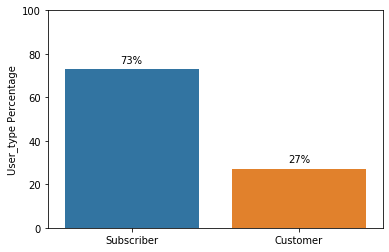

In [8]:
typepercent=df.user_type.value_counts(normalize=True).apply(lambda x: x*100) #Normalizinmg the counts and transforming to percentage
fig, ax = plt.subplots(1,1)
sns.barplot(x=typepercent.index,y=typepercent)
plt.ylim(0,100)
plt.ylabel('User_type Percentage')
rects=ax.patches
for rect in rects:
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., h+2,'{:0.0f}%'.format(h), ha='center', va='bottom');

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

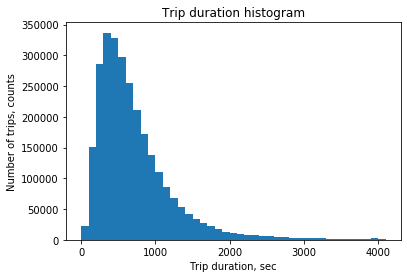

In [9]:
bin_edges = np.arange(0, df['duration_sec'].max()+100, 100)
plt.hist(df['duration_sec'], bins = bin_edges)
plt.xlabel('Trip duration, sec')
plt.ylabel('Number of trips, counts')
plt.title('Trip duration histogram');

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

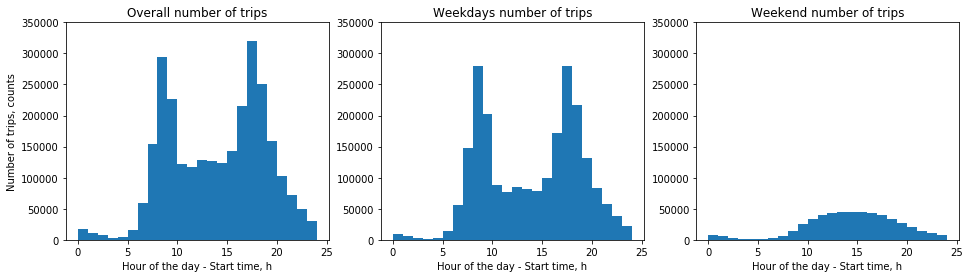

In [10]:
plt.figure(figsize = [16,4])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
plt.subplot(1, 3, 1)
plt.hist(df.start_time.dt.hour, bins=bin_data)
plt.xlabel('Hour of the day - Start time, h')
plt.title("Overall number of trips")
plt.ylabel('Number of trips, counts')
plt.ylim(0,350000);
plt.subplot(1, 3, 2)
plt.hist(df.query('weekday!="Sunday" and weekday!="Saturday"')['hour'], bins=bin_data)
plt.xlabel('Hour of the day - Start time, h')
plt.title("Weekdays number of trips")
plt.ylim(0,350000);
plt.subplot(1, 3, 3)
plt.hist(df.query('weekday=="Sunday" or weekday=="Saturday"')['hour'], bins=bin_data)
plt.xlabel('Hour of the day - Start time, h')
plt.title("Weekend number of trips")
plt.ylim(0,350000);


## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

In [11]:
stations=df['start_station_name'].value_counts().rename_axis('start_station_name').reset_index(name='counts')
station_10_start=stations.head(10)
stations_end=df['end_station_name'].value_counts().rename_axis('end_station_name').reset_index(name='counts')
station_10_end=stations_end.head(10)

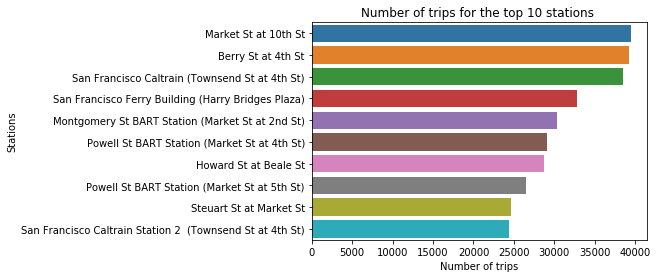

In [12]:
sns.barplot(data=station_10_start,y='start_station_name',x='counts', order=station_10_start.start_station_name)
plt.xlabel('Number of trips')
plt.title("Number of trips for the top 10 stations ")
plt.ylabel('Stations');

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

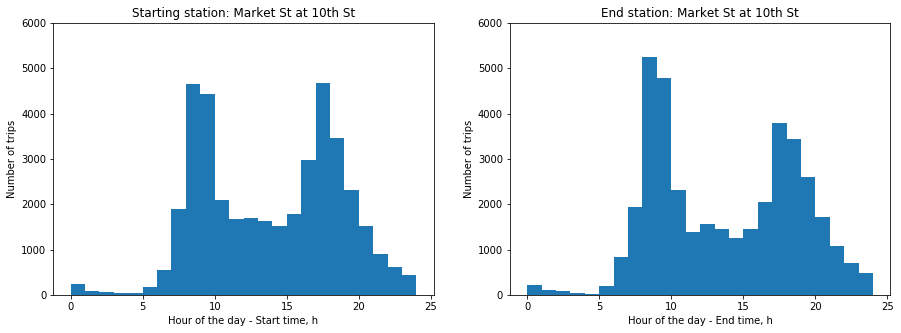

In [13]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df[df.start_station_name==station_10_start.start_station_name[0]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[0])
plt.xlabel('Hour of the day - Start time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,6000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df[df.end_station_name==station_10_end.end_station_name[4]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[4])
plt.xlabel('Hour of the day - End time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,6000);

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

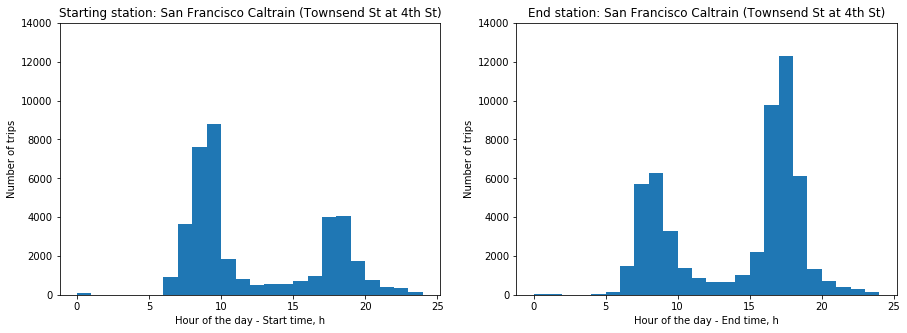

In [14]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df[df.start_station_name==station_10_start.start_station_name[2]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[2])
plt.xlabel('Hour of the day - Start time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,14000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df[df.end_station_name==station_10_end.end_station_name[0]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[0])
plt.xlabel('Hour of the day - End time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,14000);

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

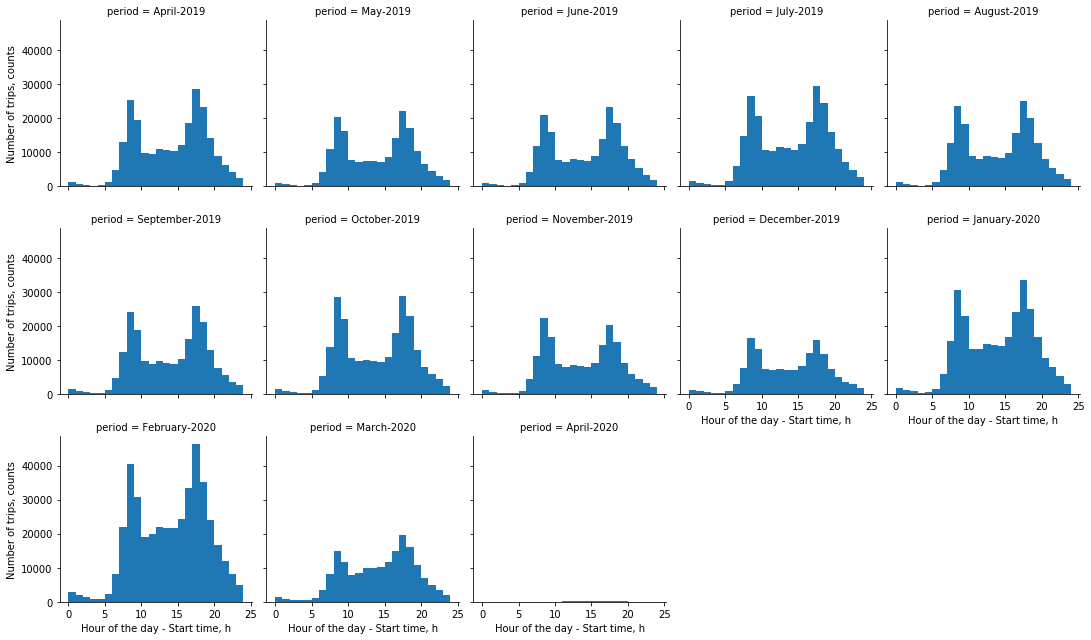

In [15]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df, col = 'period', col_wrap=5)
g.map(plt.hist,'hour',bins=bin_data)
g.axes[8].set_xlabel('Hour of the day - Start time, h')
g.axes[9].set_xlabel('Hour of the day - Start time, h')
g.axes[10].set_xlabel('Hour of the day - Start time, h')
g.axes[11].set_xlabel('Hour of the day - Start time, h')
g.axes[12].set_xlabel('Hour of the day - Start time, h')
g.axes[0].set_ylabel('Number of trips, counts')
g.axes[5].set_ylabel('Number of trips, counts')
g.axes[10].set_ylabel('Number of trips, counts');

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

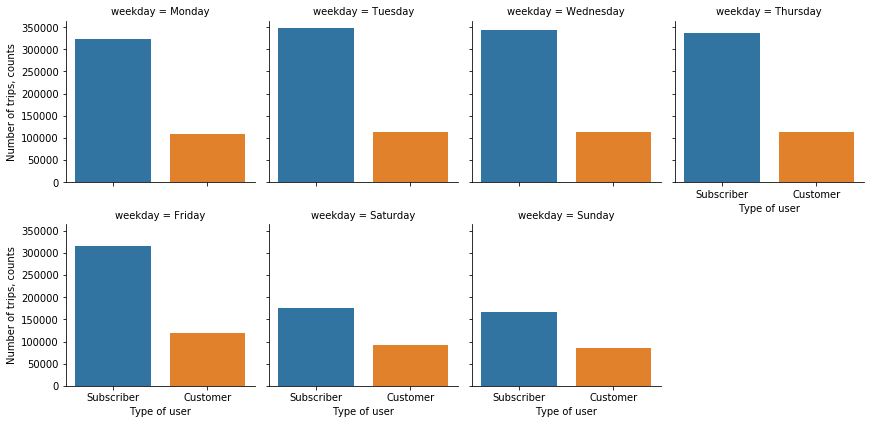

In [16]:
g = sns.FacetGrid(data = df, col = 'weekday',col_wrap=4)
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'],palette=sns.color_palette())
g.axes[3].set_xlabel('Type of user')
g.axes[4].set_xlabel('Type of user')
g.axes[5].set_xlabel('Type of user')
g.axes[6].set_xlabel('Type of user')
g.axes[0].set_ylabel('Number of trips, counts')
g.axes[4].set_ylabel('Number of trips, counts');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!